<a href="https://colab.research.google.com/github/sonicmortis/DIF62310_KelasB_25_2311532020/blob/main/Praktikum%201/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

impor library Python untuk melakukan analisis regresi pada dataset California Housing. Pertama, pandas dan numpy digunakan untuk manipulasi data, sedangkan matplotlib.pyplot digunakan untuk visualisasi. Dataset diambil menggunakan fetch_california_housing dari sklearn.datasets. Data kemudian dapat diproses dengan MinMaxScaler untuk normalisasi dan PolynomialFeatures untuk menambahkan fitur polinomial guna meningkatkan performa model. Selanjutnya, data dibagi menjadi training dan testing menggunakan train_test_split. Model regresi linier dibangun dengan LinearRegression, dan kinerjanya dievaluasi menggunakan mean_squared_error serta r2_score.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

panggil dataset lalu disimpan dalam housing, lalu konversi ke dataframe yang disimpan dalam df, Kolom target (MedHouseValue) ditambahkan ke df menggunakan nilai housing.target. Sementara itu, variabel inputs berisi seluruh fitur kecuali MedHouseValue, yang bertindak sebagai variabel independen (independent variables). Terakhir, df.head(3) menampilkan tiga baris pertama dari dataset untuk memberikan gambaran awal tentang data.

In [ ]:
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseValue'] = pd.Series(housing.target)

targets = df['MedHouseValue']              #dependent variabel
inputs = df.drop('MedHouseValue', axis=1)  #independent variable
df.head(3)                                 #Menampilkan 3 data teratas


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


untuk melihat summary statistic semua kolom dataset bisa menggunakan describe(), lalu untuk melihat datatypes kolom menggunakan info()

In [ ]:
df.describe()
df.info()


bagi data train dan test dimana data train sebanyak 70% dan data test 30%

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(14448, 8) (6192, 8)
(14448,) (6192,)


untuk melakukan scaling, bisa menggunak n minmax scaler yang disimpan dalam scale, lakukan fit dan transform pada x_train dan transform untuk x_test

In [ ]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_test)

[[8.14678418e-02 4.70588235e-01 2.34243862e-02 ... 2.56319369e-03
  3.73404255e-01 5.31872510e-01]
 [1.40094619e-01 5.68627451e-01 2.94319155e-02 ... 1.59940545e-03
  2.75531915e-01 4.87051793e-01]
 [2.05528200e-01 1.00000000e+00 2.18994569e-02 ... 5.37584539e-04
  5.58510638e-01 1.90239044e-01]
 ...
 [2.07728169e-01 2.94117647e-01 2.03757930e-02 ... 1.34975225e-03
  1.19148936e-01 6.41434263e-01]
 [2.17245279e-01 1.76470588e-01 3.27130659e-02 ... 2.29769634e-03
  5.60638298e-01 3.05776892e-01]
 [1.76004469e-01 3.13725490e-01 1.74931855e-02 ... 1.54725775e-03
  1.70212766e-01 6.08565737e-01]]


buat model linear regression yang disimpan di dalam lr_model, dan latih model menggunakan x_train dan y_train

In [ ]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

lihat nilai koefisien dan intercept menggunakan intercept_ dan coef_

In [ ]:
print(f'intercept {lr_model.intercept_}')
print(f'slope {lr_model.coef_}')

intercept 3.6307047193242434
slope [  6.46451636   0.49377527 -17.21787732  19.70092818  -0.02767764
  -4.1877334   -3.93424542  -4.35422728]


In [ ]:
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = lr_model.score(X_test, y_test)
print(f'MSE: {mse}')
print(f'R2: {r2}')

MSE: 0.5305677824766751
R2: 0.5957702326061665


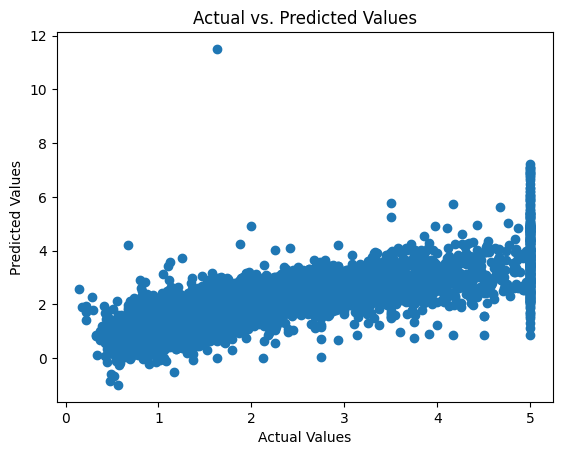

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()